In [1]:
import numpy as np
from networkx import karate_club_graph, to_numpy_matrix, adjacency_matrix
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from sklearn import metrics

zkc = karate_club_graph()

# 1st way to get adjacency matrix
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)

# 2nd way to get adjacency matrix
W = adjacency_matrix(zkc)

D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D)) #D = degree matrix

#groundTruth = [0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1] #group in zachary karate club
groundTruth = [1,1,2,1,0,0,0,1,3,2,0,1,1,1,3,3,0,1,3,1,3,1,3,3,2,2,3,2,2,3,3,2,3,3] #group in zachary karate club

In [2]:
L = D-A

vals, vecs = np.linalg.eig(L)

## eigenvalues
#print('eigenvalues:')
#print(vals)
## eigenvectors
#print('eigenvectors:')
#print(vecs)


vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

#use the first dimension to define cluster.
#clusters = [0 if i >0 else 1 for i in vecs[:,1]]
#print(clusters)

2


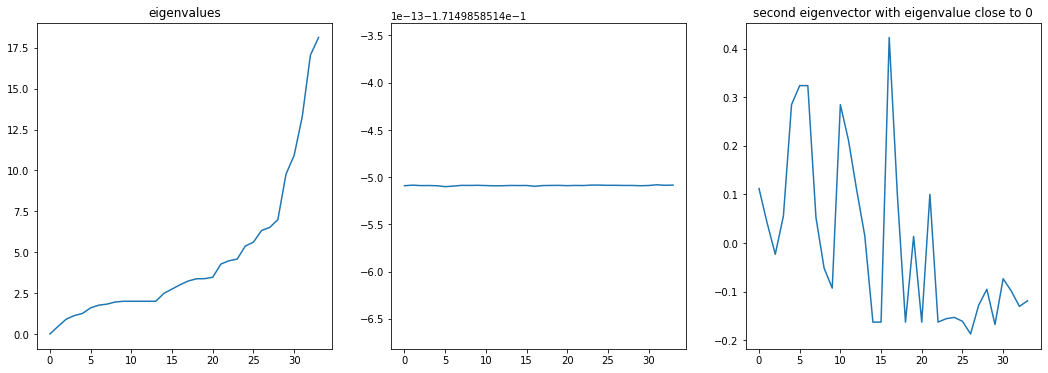

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(vals)
ax1.title.set_text('eigenvalues')
i = np.where(vals < 0.5)[0]
print(len(i))
ax2 = plt.subplot(132)
plt.plot(vecs[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(vecs[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')


In [4]:
vecs[:, 1:4]

matrix([[ 0.11213743,  0.06940423,  0.07181871],
        [ 0.04128789,  0.09514749,  0.19454754],
        [-0.02321896,  0.04270411,  0.09881107],
        [ 0.05549978,  0.10584319,  0.21217767],
        [ 0.28460453, -0.12126623, -0.03113051],
        [ 0.32372722, -0.20167565, -0.09905757],
        [ 0.32372722, -0.20167565, -0.09905757],
        [ 0.052586  ,  0.10130188,  0.20081988],
        [-0.05160128,  0.01467707,  0.04634388],
        [-0.09280089,  0.01311954,  0.08990031],
        [ 0.28460453, -0.12126623, -0.03113051],
        [ 0.21099295,  0.76476516, -0.57450041],
        [ 0.1094613 ,  0.16066655,  0.32457127],
        [ 0.01474197,  0.06959724,  0.14379542],
        [-0.16275078, -0.06068003, -0.06345644],
        [-0.16275078, -0.06068003, -0.06345644],
        [ 0.42276533, -0.36979183, -0.22642009],
        [ 0.10018142,  0.15086075,  0.3044223 ],
        [-0.16275078, -0.06068003, -0.06345644],
        [ 0.01363713,  0.06512382,  0.13131648],
        [-0.16275078

In [5]:
U = np.array(vecs[:, i[1:4]])
km = KMeans(init='k-means++',n_init=100, n_clusters=4)
km.fit(U)

#km.labels_ = [abs(i-1) for i in km.labels_]
print(metrics.adjusted_rand_score(groundTruth, km.labels_))
print(metrics.adjusted_mutual_info_score(groundTruth, km.labels_))
print(metrics.accuracy_score(groundTruth, km.labels_))
print(groundTruth)
print(km.labels_)

0.6058218318695107
0.6610727399080657
0.08823529411764706
[1, 1, 2, 1, 0, 0, 0, 1, 3, 2, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3]
[2 2 3 2 1 1 1 2 3 3 1 1 2 2 0 0 1 2 0 2 0 2 0 0 0 0 0 0 3 0 3 3 0 0]


In [18]:
n = 4 #number of clusters
#Spectral Clustering method
model = SpectralClustering(n_clusters = n, n_init=100,assign_labels='discretize')
#model.fit(vecs[:,1])
labels = model.fit_predict(vecs[:, i[1:4]])

#labels = [abs(i-1) for i in labels]
print(metrics.adjusted_rand_score(groundTruth, labels))
print(metrics.adjusted_mutual_info_score(groundTruth, labels))
print(metrics.accuracy_score(groundTruth, labels))
print(groundTruth)
print(labels)

0.43175702234451063
0.5082045010123812
0.0
[1, 1, 2, 1, 0, 0, 0, 1, 3, 2, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3]
[0 0 0 0 2 2 2 0 0 1 2 2 0 0 1 1 2 0 1 3 1 0 1 1 1 1 1 1 1 1 0 1 1 1]


34.0


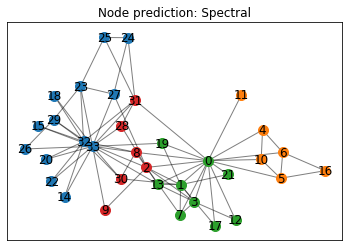

In [7]:
import networkx as nx
def get_node_color(input):
    if input==1:
        return "red"
    elif input==2:
        return "green"
    elif input==3:
        return "blue"
    elif input ==4:
        return "yellow"

#drawing
size = float(len(groundTruth))
print(size)
labels_dict = dict(enumerate(km.labels_.flatten(), 0))
pos = nx.spring_layout(zkc)
count = 0.
for com in set(km.labels_) :
    count = count + 1.
    list_nodes = [nodes for nodes in labels_dict
                                if labels_dict[nodes] == com]
    nx.draw_networkx_nodes(zkc, pos, list_nodes, node_size = 100,
                                node_color = get_node_color(count / size))


nx.draw_networkx_edges(zkc, pos, alpha=0.5)
nx.draw_networkx_labels(zkc, pos)
plt.title('Node prediction: Spectral')
plt.show()

In [8]:
from sklearn import metrics
#km.labels_ = [abs(i-1) for i in km.labels_]
print(metrics.adjusted_rand_score(groundTruth, km.labels_))
print(metrics.adjusted_mutual_info_score(groundTruth, km.labels_))
print(metrics.accuracy_score(groundTruth, km.labels_))
print(groundTruth)
print(km.labels_)

0.6058218318695107
0.6610727399080657
0.08823529411764706
[1, 1, 2, 1, 0, 0, 0, 1, 3, 2, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3]
[2 2 3 2 1 1 1 2 3 3 1 1 2 2 0 0 1 2 0 2 0 2 0 0 0 0 0 0 3 0 3 3 0 0]


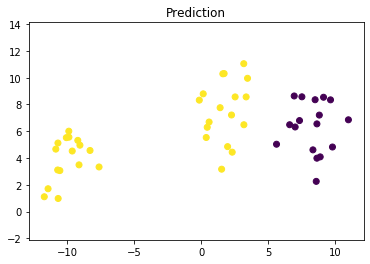

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import datasets
#create datasets
#X = numpy.ndarray of numpy.ndarray size =50*2, y = numpy.ndarray
X,y = datasets.make_blobs(n_samples=50, centers=3, n_features=2, random_state= 20, cluster_std = 1.5)
#parameter setting
n = 2 #number of clusters
#Spectral Clustering method
model = SpectralClustering(n_clusters = n, 
                           assign_labels = 'discretize')
model.fit(X)
labels = model.fit_predict(X)
#results visualization
plt.figure()
plt.scatter(X[:,0], X[:,1], c = labels)
plt.axis('equal')
plt.title('Prediction')
plt.show()